<a href="https://colab.research.google.com/github/jujaehong/my_study/blob/main/20230504.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
stock = pd.read_csv('/content/stock_2020_01.csv',encoding='CP949')
stock

In [ ]:
stock.head

<bound method NDFrame.head of                       Date    kospi  kosdaq  gold_fut_132030  Bond_273130
0    2020. 1. 2 오후 3:30:00  2175.17  674.02            10845       108215
1    2020. 1. 3 오후 3:30:00  2176.46  669.93            11000       108565
2    2020. 1. 6 오후 3:30:00  2155.07  655.31            11245       108745
3    2020. 1. 7 오후 3:30:00  2175.54  663.44            11180       108400
4    2020. 1. 8 오후 3:30:00  2151.31  640.94            11360       108270
5    2020. 1. 9 오후 3:30:00  2186.45  666.09            11055       107980
6   2020. 1. 10 오후 3:30:00  2206.39  673.03            11035       107760
7   2020. 1. 13 오후 3:30:00  2229.26  679.22            11080       107695
8   2020. 1. 14 오후 3:30:00  2238.88  678.71            10975       107860
9   2020. 1. 15 오후 3:30:00  2230.98  679.16            11060       108020
10  2020. 1. 16 오후 3:30:00  2248.05  686.52            11060       108015
11  2020. 1. 17 오후 3:30:00  2250.57  688.41            11075       107830
12  2020

In [ ]:
stock.describe() #median= 50% # 수치형 변수 # 연속형 변수

,kospi,kosdaq,gold_fut_132030,Bond_273130
count,20.00000,20.000000,20.000000,20.0000
mean,2203.44250,671.117000,11112.000000,108188.7500
std,43.83648,14.040831,115.762916,364.6912
min,2119.01000,640.940000,10845.000000,107695.0000
25%,2175.44750,664.385000,11053.750000,107942.5000
50%,2196.42000,673.525000,11080.000000,108030.0000
75%,2241.30000,680.282500,11187.500000,108478.7500
max,2267.25000,688.410000,11360.000000,108810.0000


In [ ]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             20 non-null     object 
 1   kospi            20 non-null     float64
 2   kosdaq           20 non-null     float64
 3   gold_fut_132030  20 non-null     int64  
 4   Bond_273130      20 non-null     int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 928.0+ bytes


In [ ]:
stock.isnull().sum()

Date               0
kospi              0
kosdaq             0
gold_fut_132030    0
Bond_273130        0
dtype: int64

In [ ]:
stock['Date']

0      2020. 1. 2 오후 3:30:00
1      2020. 1. 3 오후 3:30:00
2      2020. 1. 6 오후 3:30:00
3      2020. 1. 7 오후 3:30:00
4      2020. 1. 8 오후 3:30:00
5      2020. 1. 9 오후 3:30:00
6     2020. 1. 10 오후 3:30:00
7     2020. 1. 13 오후 3:30:00
8     2020. 1. 14 오후 3:30:00
9     2020. 1. 15 오후 3:30:00
10    2020. 1. 16 오후 3:30:00
11    2020. 1. 17 오후 3:30:00
12    2020. 1. 20 오후 3:30:00
13    2020. 1. 21 오후 3:30:00
14    2020. 1. 22 오후 3:30:00
15    2020. 1. 23 오후 3:30:00
16    2020. 1. 28 오후 3:30:00
17    2020. 1. 29 오후 3:30:00
18    2020. 1. 30 오후 3:30:00
19    2020. 1. 31 오후 3:30:00
Name: Date, dtype: object

In [ ]:
series = pd.Series([100,200,300])
series

0    100
1    200
2    300
dtype: int64

In [ ]:
series.map({100:'c',200:'b',300:'a'})

0    c
1    b
2    a
dtype: object

In [ ]:
series.map('${}'.format)

0    $100
1    $200
2    $300
dtype: object

In [ ]:
series.map('####{}'.format)

0    ####100
1    ####200
2    ####300
dtype: object

In [ ]:
series.map('@#${}'.format)

0    @#$100
1    @#$200
2    @#$300
dtype: object

In [ ]:
s = pd.Series([20,21,12],index=['London','New York','Helsinki'])
print(s)

London      20
New York    21
Helsinki    12
dtype: int64


In [ ]:
def sub_custom_value(x,val):
  return x-val
s.apply(sub_custom_value,args=(10,))

London      10
New York    11
Helsinki     2
dtype: int64

In [ ]:
def add_custom_values(x,**kwargs):
    for month in kwargs:
        print(month)
        x +=kwargs[month]
    return x

In [ ]:
s.apply(add_custom_values, june=30, july=20,august=25)

june
july
august
june
july
august
june
july
august


London      95
New York    96
Helsinki    87
dtype: int64

- axis별로 apply를 적용가능

In [ ]:
import pandas as pd
import numpy as np

frame = pd.DataFrame(np.arange(12).reshape(3,4),
                     columns = list('abcd'))
frame

,a,b,c,d
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11


In [ ]:
frame.apply(lambda x : x.max()-x.min()) #axis=0 : default
#default : 별도 설정 하지 않은 '초기값' 즉,'기본 설정값'을 의미.

a    8
b    8
c    8
d    8
dtype: int64

In [ ]:
frame.apply(lambda x : x.max()-x.min(),axis=1)

0    3
1    3
2    3
dtype: int64

- applymap
    - 모든 원소에 원소별로 함수에 적용.

In [ ]:
frame.applymap(lambda x: x**2)

,a,b,c,d
0,0,1,4,9
1,16,25,36,49
2,64,81,100,121


- drop
 - row나 column에서 특정한 label을 삭제하는 함수.

In [ ]:
frame = pd.DataFrame(np.arange(16).reshape(4,4),
                     index = ['r1','r2','r3','r4'],
                     columns = ['c1','c2','c3','c4'])
frame

,c1,c2,c3,c4
r1,0,1,2,3
r2,4,5,6,7
r3,8,9,10,11
r4,12,13,14,15


In [ ]:
frame.drop('r1')

,c1,c2,c3,c4
r2,4,5,6,7
r3,8,9,10,11
r4,12,13,14,15


In [ ]:
frame.drop('c1',axis=1) #KeyError: "['c1'] not found in axis"

,c2,c3,c4
r1,1,2,3
r2,5,6,7
r3,9,10,11
r4,13,14,15


In [ ]:
frame.drop(columns=['c3','c4'])

,c1,c2
r1,0,1
r2,4,5
r3,8,9
r4,12,13


In [ ]:
frame.drop('r2',inplace=True)

In [ ]:
frame

,c1,c2,c3,c4
r3,8,9,10,11
r4,12,13,14,15


- 데이터 병함
 - concat

In [ ]:
s1 = pd.Series([100,200],index=['c','d'])
s2 = pd.Series([300,300,300],index=['c','d','e'])
s3 = pd.Series([500,600],index = ['f','g'])

print(s1,s2,s3, sep = '\n\n')

c    100
d    200
dtype: int64

c    300
d    300
e    300
dtype: int64

f    500
g    600
dtype: int64


In [ ]:
pd.concat([s1,s2,s3])

c    100
d    200
c    300
d    300
e    300
f    500
g    600
dtype: int64

In [ ]:
pd.concat([s1,s2],axis = 1) #SQL의 out join(합집합)으로 돌아감.

,0,1
c,100.0,300
d,200.0,300
e,NaN,300


- Merge
 - key를 이용해 데이터의 row를 기준으로 연결시켜 합침(SQL의 join과 유사)

In [70]:
data1 = pd.DataFrame({'id':['01','02','03','04','05','06'],
                      'col1':np.random.randint(0,50,6),
                      'col2':np.random.randint(1000,2000,6)
                      })
data1

,id,col1,col2
0,01,35,1655
1,02,5,1301
2,03,46,1131
3,04,7,1457
4,05,22,1395
5,06,48,1971


In [71]:
data2 = pd.DataFrame({'id':['04','05','06','07'],
                      'col1':np.random.randint(1000,5000,4)})
data2

,id,col1
0,04,1501
1,05,4283
2,06,4698
3,07,1179


In [74]:
#inner join(교집합)
pd.merge(data1,data2,on='id') #on은 기준

,id,col1_x,col2,col1_y
0,04,7,1457,1501
1,05,22,1395,4283
2,06,48,1971,4698


In [80]:
#how : 어떤 방식으로 병합할 것 인가?{inner,outer,left,right}
pd.merge(data1,data2,on='id',how='left') #on은 기준

,id,col1_x,col2,col1_y
0,01,35,1655,NaN
1,02,5,1301,NaN
2,03,46,1131,NaN
3,04,7,1457,1501.0
4,05,22,1395,4283.0
5,06,48,1971,4698.0


In [81]:
#outuer join(합집합)
pd.merge(data1,data2,on='id',how='outer') #on은 기준

,id,col1_x,col2,col1_y
0,01,35.0,1655.0,NaN
1,02,5.0,1301.0,NaN
2,03,46.0,1131.0,NaN
3,04,7.0,1457.0,1501.0
4,05,22.0,1395.0,4283.0
5,06,48.0,1971.0,4698.0
6,07,NaN,NaN,1179.0


- missing data
 - dropna : 결측치가 있는 것을 삭제.


In [82]:
obj = pd.Series(['apple','mango',np.nan,None,'peach',1])
obj

0    apple
1    mango
2      NaN
3     None
4    peach
5        1
dtype: object

In [83]:
obj.dropna()

0    apple
1    mango
4    peach
5        1
dtype: object

In [85]:
frame = pd.DataFrame([[np.nan,np.nan,np.nan,np.nan],[10,5,40,6],[5,2,30,8],[15,3,10,np.nan]],
                     columns=['x1','x2','x3','x4'])
frame

,x1,x2,x3,x4
0,NaN,NaN,NaN,NaN
1,10.0,5.0,40.0,6.0
2,5.0,2.0,30.0,8.0
3,15.0,3.0,10.0,NaN


In [87]:
frame.dropna()

,x1,x2,x3,x4
1,10.0,5.0,40.0,6.0
2,5.0,2.0,30.0,8.0


In [88]:
frame.dropna(how = 'all')

,x1,x2,x3,x4
1,10.0,5.0,40.0,6.0
2,5.0,2.0,30.0,8.0
3,15.0,3.0,10.0,NaN


In [89]:
frame.fillna(0) #ffill, bill,backfill,'pad',None


,x1,x2,x3,x4
0,0.0,0.0,0.0,0.0
1,10.0,5.0,40.0,6.0
2,5.0,2.0,30.0,8.0
3,15.0,3.0,10.0,0.0


In [90]:
frame.fillna({'x1':10,'x3':3})

,x1,x2,x3,x4
0,10.0,NaN,3.0,NaN
1,10.0,5.0,40.0,6.0
2,5.0,2.0,30.0,8.0
3,15.0,3.0,10.0,NaN


In [91]:
frame.isna().sum()

x1    1
x2    1
x3    1
x4    2
dtype: int64

- 중복제거
    - 1. duplicated() : 각 row가 중복인지(True) 아닌지(False) 알려주는 불리언 Series 변환.
    - 2. drop_duplicates() : duplicated를 적용한 결과가 False인 것들만 모아서 dataframe 반환.

In [97]:
data = pd.DataFrame({'id':['0001','0002','0003','0001'],
                     'name':['a','b','c','a']})
data

,id,name
0,0001,a
1,0002,b
2,0003,c
3,0001,a


In [98]:
data.duplicated() # 중복 체크(True-> 중복이 되어있다.) 

0    False
1    False
2    False
3     True
dtype: bool

In [99]:
data.drop_duplicates() # 중복을 삭제.

,id,name
0,0001,a
1,0002,b
2,0003,c


- cut

In [109]:
ages = [20,35,67,39,59,44,56,77,28,80,32,46,52,19,33,5,15,50,29,21,33,48,85,80,31,10]
bins = [0,20,40,60,100]


In [110]:
cuts = pd.cut(ages,bins)
cuts

[(0, 20], (20, 40], (60, 100], (20, 40], (40, 60], ..., (40, 60], (60, 100], (60, 100], (20, 40], (0, 20]]
Length: 26
Categories (4, interval[int64, right]): [(0, 20] < (20, 40] < (40, 60] < (60, 100]]

In [111]:
cuts.categories #cut 메소드의 결과는 Categorical이라는 특수 객체에 존재.

IntervalIndex([(0, 20], (20, 40], (40, 60], (60, 100]], dtype='interval[int64, right]')

In [112]:
cuts.codes

array([0, 1, 3, 1, 2, 2, 2, 3, 1, 3, 1, 2, 2, 0, 1, 0, 0, 2, 1, 1, 1, 2,
       3, 3, 1, 0], dtype=int8)

In [115]:
#구간을 균등한 길이로 나눔.
pd.cut(ages,4,precision=3).value_counts()
#precision : 소수점 자릿수, 3이면 소수점 세번째에서 반올림.

(4.92, 25.0]    6
(25.0, 45.0]    9
(45.0, 65.0]    6
(65.0, 85.0]    5
dtype: int64

In [116]:
#구간을 균등한 길이로 나눔.
pd.qcut(ages,4)

[(4.999, 28.25], (28.25, 37.0], (55.0, 85.0], (37.0, 55.0], (55.0, 85.0], ..., (37.0, 55.0], (55.0, 85.0], (55.0, 85.0], (28.25, 37.0], (4.999, 28.25]]
Length: 26
Categories (4, interval[float64, right]): [(4.999, 28.25] < (28.25, 37.0] < (37.0, 55.0] <
                                           (55.0, 85.0]]

- get_dummies
 - categorical variable(명목형 변수)를 one - hotencoding 해줌


In [117]:
df = pd.DataFrame({'col1':[10,20,30],
                   'col2':['a','b','a']})
df

,col1,col2
0,10,a
1,20,b
2,30,a


In [120]:
pd.get_dummies(df)

,col1,col2_a,col2_b
0,10,1,0
1,20,0,1
2,30,1,0


In [13]:
import pandas as pd

kbo = pd.read_csv('/content/kbo.csv')
kbo

,연도,순위,팀,경기수,승,패,무,승률,게임차
0,2019,1,두산,144,88,55,1,0.615,0.0
1,2019,2,키움,144,86,57,1,0.601,2.0
2,2019,3,SK,144,88,55,1,0.615,0.0
3,2019,4,LG,144,79,64,1,0.552,9.0
4,2019,5,NC,144,73,69,2,0.514,14.5
5,2019,6,KT,144,71,71,2,0.500,16.5
6,2019,7,KIA,144,62,80,2,0.437,25.5
7,2019,8,삼성,144,60,83,1,0.420,28.0
8,2019,9,한화,144,58,86,0,0.403,30.5
9,2019,10,롯데,144,48,93,3,0.340,39.0


In [14]:
kbo.shape

(30, 9)

In [15]:
kbo.columns

Index(['연도', '순위', '팀', '경기수', '승', '패', '무', '승률', '게임차'], dtype='object')

In [16]:
kbo['팀'].unique()

array(['두산', '키움', 'SK', 'LG', 'NC', 'KT', 'KIA', '삼성', '한화', '롯데', '넥센'],
      dtype=object)

In [17]:
kbo.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   연도      30 non-null     int64  
 1   순위      30 non-null     int64  
 2   팀       30 non-null     object 
 3   경기수     30 non-null     int64  
 4   승       30 non-null     int64  
 5   패       30 non-null     int64  
 6   무       30 non-null     int64  
 7   승률      30 non-null     float64
 8   게임차     30 non-null     float64
dtypes: float64(2), int64(6), object(1)
memory usage: 2.2+ KB


In [18]:
kbo.describe()

,연도,순위,경기수,승,패,무,승률,게임차
count,30.000000,30.000000,30.0,30.000000,30.000000,30.000000,30.000000,30.000000
mean,2018.000000,5.466667,144.0,71.200000,71.200000,1.600000,0.499800,12.833333
std,0.830455,2.921187,0.0,11.871147,11.591912,1.275769,0.082079,12.576204
min,2017.000000,1.000000,144.0,48.000000,51.000000,0.000000,0.340000,-14.500000
25%,2017.000000,3.000000,144.0,61.250000,62.500000,1.000000,0.431750,2.375000
50%,2018.000000,5.000000,144.0,70.500000,71.500000,1.000000,0.494500,9.750000
75%,2019.000000,8.000000,144.0,79.000000,80.750000,2.000000,0.558000,19.500000
max,2019.000000,10.000000,144.0,93.000000,94.000000,5.000000,0.646000,39.000000


In [19]:
kbo.isna().sum()
#kbo.isnul().sum()

연도     0
순위     0
팀      0
경기수    0
승      0
패      0
무      0
승률     0
게임차    0
dtype: int64

In [23]:
#groupby를 하며 group으로 묶인 Groupby  객체를 반환.
#이 객체는 그룹 연산을 위해 필요한 모든 정보를 가지고 있음.
kbo.groupby('팀')

In [22]:
kbo.groupby('팀').count()

,연도,순위,경기수,승,패,무,승률,게임차
팀,,,,,,,,
KIA,3,3,3,3,3,3,3,3
KT,3,3,3,3,3,3,3,3
LG,3,3,3,3,3,3,3,3
NC,3,3,3,3,3,3,3,3
SK,3,3,3,3,3,3,3,3
넥센,2,2,2,2,2,2,2,2
두산,3,3,3,3,3,3,3,3
롯데,3,3,3,3,3,3,3,3
삼성,3,3,3,3,3,3,3,3


In [24]:
kbo.groupby(['연도','팀']).sum()

순위  경기수   승   패  무     승률   게임차
연도   팀                                   
2017 KIA   1  144  87  56  1  0.608   0.0
     KT   10  144  50  94  0  0.347  37.5
     LG    6  144  69  72  3  0.489  17.0
     NC    4  144  79  62  3  0.560   7.0
     SK    5  144  75  68  1  0.524  12.0
     넥센    7  144  69  73  2  0.486  17.5
     두산    2  144  84  57  3  0.596   2.0
     롯데    3  144  80  62  2  0.563   6.5
     삼성    9  144  55  84  5  0.396  30.0
     한화    8  144  61  81  2  0.430  25.5
2018 KIA   5  144  70  74  0  0.486   8.5
     KT    9  144  59  82  3  0.418  18.0
     LG    8  144  68  75  1  0.476  10.0
     NC   10  144  58  85  1  0.406  20.0
     SK    2  144  78  65  1  0.545   0.0
     넥센    4  144  75  69  0  0.521   3.5
     두산    1  144  93  51  0  0.646 -14.5
     롯데    7  144  68  74  2  0.479   9.5
     삼성    5  144  68  72  4  0.486   8.5
     한화    3  144  77  67  0  0.535   1.5
2019 KIA   7  144  62  80  2  0.437  25.5
     KT    6  144  71  71  2  0.500  16.5
     LG    4  144  79  64  1  0.552   9.0
     NC    5  144  73  69  2  0.514  14.5
     SK    3  144  88  55  1  0.615   0.0
     두산    1  144  88  55  1  0.615   0.0
     롯데   10  144  48  93  3  0.340  39.0
     삼성    8  144  60  83  1  0.420  28.0
     키움    2  144  86  57  1  0.601   2.0
     한화    9  144  58  86  0  0.403  30.5

In [26]:
kbo.groupby('팀')['승률'].max()

팀
KIA    0.608
KT     0.500
LG     0.552
NC     0.560
SK     0.615
넥센     0.521
두산     0.646
롯데     0.563
삼성     0.486
키움     0.601
한화     0.535
Name: 승률, dtype: float64

In [27]:
kbo.groupby(['연도','팀'])['승률','순위'].max()

<ipython-input-27-668da1a288a7>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  kbo.groupby(['연도','팀'])['승률','순위'].max()


승률  순위
연도   팀             
2017 KIA  0.608   1
     KT   0.347  10
     LG   0.489   6
     NC   0.560   4
     SK   0.524   5
     넥센   0.486   7
     두산   0.596   2
     롯데   0.563   3
     삼성   0.396   9
     한화   0.430   8
2018 KIA  0.486   5
     KT   0.418   9
     LG   0.476   8
     NC   0.406  10
     SK   0.545   2
     넥센   0.521   4
     두산   0.646   1
     롯데   0.479   7
     삼성   0.486   5
     한화   0.535   3
2019 KIA  0.437   7
     KT   0.500   6
     LG   0.552   4
     NC   0.514   5
     SK   0.615   3
     두산   0.615   1
     롯데   0.340  10
     삼성   0.420   8
     키움   0.601   2
     한화   0.403   9

In [28]:
grouped = kbo.groupby('팀')

for name,group in grouped:
    print(name)
    print(group)

    print('-'*50)

KIA
      연도  순위    팀  경기수   승   패  무     승률   게임차
6   2019   7  KIA  144  62  80  2  0.437  25.5
14  2018   5  KIA  144  70  74  0  0.486   8.5
20  2017   1  KIA  144  87  56  1  0.608   0.0
--------------------------------------------------
KT
      연도  순위   팀  경기수   승   패  무     승률   게임차
5   2019   6  KT  144  71  71  2  0.500  16.5
18  2018   9  KT  144  59  82  3  0.418  18.0
29  2017  10  KT  144  50  94  0  0.347  37.5
--------------------------------------------------
LG
      연도  순위   팀  경기수   승   패  무     승률   게임차
3   2019   4  LG  144  79  64  1  0.552   9.0
17  2018   8  LG  144  68  75  1  0.476  10.0
25  2017   6  LG  144  69  72  3  0.489  17.0
--------------------------------------------------
NC
      연도  순위   팀  경기수   승   패  무     승률   게임차
4   2019   5  NC  144  73  69  2  0.514  14.5
19  2018  10  NC  144  58  85  1  0.406  20.0
23  2017   4  NC  144  79  62  3  0.560   7.0
--------------------------------------------------
SK
      연도  순위   팀  경기수   승   패  무     승률 

# 판다스 인 액션

- 셜록 홈즈는 아서 코난 도일의 첫 번째 고전 단편 소설 <보헤미아 왕국의 스캔들>에서 조수인 존 왓슨에게 이렇게 조언합니다. **"데이터를 얻기 전에 이론부터 세우는 것은 중대한 실수입니다. 사실에 맞는 이론을 세우지 않고 이론에 맞게 사실을 왜곡하는 것은 아주 어리석은 일이죠."**

- 이코노미스트(The Economist)는 2017년 의견서에 '세상에 가장 가치있는 자원은 더 이상 석유가 아니라 데이터'라고 언급하였습니다.

- 데이터는 근거이며, 근거는 상호 연결된 세계에서 점점 더 복잡해지는 문제를 해결하는 기업, 정부, 기관과 개인에게 매우 중요합니다.

- 유엔 사무총장 안토니오 구테흐스는 정확한 데이터를 '좋은 정책과 의사 결정의 생명선'이라고 표현
 
- 데이터 랭글링 : 다양한 데이터 소스의 데이터를 통합하고 쉽게 액세스하고 분석할 수 있도록 정리하는 프로세스.

- 파이썬의 창시자인 귀도 반 로섬은 "파이썬으로 코딩하는 즐거움은 적은 양의 명확한 코드로 많은 동작을 표현하는 짧고 간결하며 가독성 있는 자료구조 보는 데에 있습니다. 

In [75]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/paskhaver/pandas-in-action/master/chapter_01_introducing_pandas/movies.csv', index_col='Title')
df

,Rank,Studio,Gross,Year
Title,,,,
Avengers: Endgame,1,Buena Vista,"$2,796.30",2019
Avatar,2,Fox,"$2,789.70",2009
Titanic,3,Paramount,"$2,187.50",1997
Star Wars: The Force Awakens,4,Buena Vista,"$2,068.20",2015
Avengers: Infinity War,5,Buena Vista,"$2,048.40",2018
...,...,...,...,...
Yogi Bear,778,Warner Brothers,$201.60,2010
Garfield: The Movie,779,Fox,$200.80,2004
Cats & Dogs,780,Warner Brothers,$200.70,2001


In [ ]:
# import pandas as pd

# df = pd.read_csv('https://raw.githubusercontent.com/paskhaver/pandas-in-action/master/chapter_01_introducing_pandas/movies.csv')
# df

In [ ]:
# df[df['Title'] == 'Forrest Gump']    위에 주소에 - index_col을 옵션을 선택을 안했을 경우 복잡해진다. (기준이 사라져서)

- 객체는 데이터를 저장하는 컨테이너라고 생각하면 좋음.
- 서로 다른 객체는 서로 다른 유형의 데이터에 최적화되어 있으며 서로 다른 방식으로 상호작용함.
- 판다스는 한 가지 유형의 객체(DataFrame)를 사용하여 다중 열의 데이터셋을 저장하고 다른 유형의 객체(Series)를 사용하여 단일 열 데이터셋에 저장. DataFrame은 엑셀의 다중 열 테이블과 유사.

- Rank(순위), Title(제목), Stuido(제작사), Gross(총수익), Year(개봉연도)
- 두 번째 행에는 첫 번째 레코드 또는 첫 번째 영화의 데이터가 나열됨.

In [35]:
df.head()

,Rank,Studio,Gross,Year
Title,,,,
Avengers: Endgame,1,Buena Vista,"$2,796.30",2019
Avatar,2,Fox,"$2,789.70",2009
Titanic,3,Paramount,"$2,187.50",1997
Star Wars: The Force Awakens,4,Buena Vista,"$2,068.20",2015
Avengers: Infinity War,5,Buena Vista,"$2,048.40",2018


In [37]:
df.tail()

,Rank,Studio,Gross,Year
Title,,,,
Yogi Bear,778,Warner Brothers,$201.60,2010
Garfield: The Movie,779,Fox,$200.80,2004
Cats & Dogs,780,Warner Brothers,$200.70,2001
The Hunt for Red October,781,Paramount,$200.50,1990
Valkyrie,782,MGM,$200.30,2008


In [39]:
df.shape

(782, 4)

In [40]:
df.size

3128

In [41]:
df.dtypes # dtypes 보다는 info()함수가 더 좋음.

Rank       int64
Studio    object
Gross     object
Year       int64
dtype: object

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 782 entries, Avengers: Endgame to Valkyrie
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Rank    782 non-null    int64 
 1   Studio  782 non-null    object
 2   Gross   782 non-null    object
 3   Year    782 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 46.7+ KB


- 500번째 영화 꺼내기

In [50]:
df.iloc[499]

Rank                              500
Title     Maze Runner: The Death Cure
Studio                            Fox
Gross                        $288.30 
Year                             2018
Name: 499, dtype: object

- 모두가 사랑하는 눈물 없이 볼 수 없는 영화 포레스트 검프(Forrest Gump)의 행 값을 추출

In [53]:
df.loc['Forrest Gump']

Rank            119
Studio    Paramount
Gross      $677.90 
Year           1994
Name: Forrest Gump, dtype: object

- 인덱스 레이블에는 중복 항목이 있을 수 있음.

In [54]:
df.loc['101 Dalmatians']

,Rank,Studio,Gross,Year
Title,,,,
101 Dalmatians,425,Buena Vista,$320.70,1996
101 Dalmatians,708,Buena Vista,$215.90,1961


In [55]:
df.sort_values(by='Year', ascending=False).head()

,Rank,Studio,Gross,Year
Title,,,,
Avengers: Endgame,1,Buena Vista,"$2,796.30",2019
John Wick: Chapter 3 - Parabellum,458,Lionsgate,$304.70,2019
The Wandering Earth,114,China Film Corporation,$699.80,2019
Toy Story 4,198,Buena Vista,$519.80,2019
How to Train Your Dragon: The Hidden World,199,Universal,$519.80,2019


In [56]:
df.sort_values(by=['Studio','Year']).head()

,Rank,Studio,Gross,Year
Title,,,,
The Blair Witch Project,588,Artisan,$248.60,1999
101 Dalmatians,708,Buena Vista,$215.90,1961
The Jungle Book,755,Buena Vista,$205.80,1967
Who Framed Roger Rabbit,410,Buena Vista,$329.80,1988
Dead Poets Society,636,Buena Vista,$235.90,1989


In [57]:
df.sort_index().head()

,Rank,Studio,Gross,Year
Title,,,,
"10,000 B.C.",536,Warner Brothers,$269.80,2008
101 Dalmatians,708,Buena Vista,$215.90,1961
101 Dalmatians,425,Buena Vista,$320.70,1996
2 Fast 2 Furious,632,Universal,$236.40,2003
2012,93,Sony,$769.70,2009


- 하나 이상의 기준으로 열 필터링.

In [58]:
df['Studio'] =='Uninversal'

Title
Avengers: Endgame               False
Avatar                          False
Titanic                         False
Star Wars: The Force Awakens    False
Avengers: Infinity War          False
                                ...  
Yogi Bear                       False
Garfield: The Movie             False
Cats & Dogs                     False
The Hunt for Red October        False
Valkyrie                        False
Name: Studio, Length: 782, dtype: bool

In [60]:
df[df['Studio']=='Universal']

,Rank,Studio,Gross,Year
Title,,,,
Jurassic World,6,Universal,"$1,671.70",2015
Furious 7,8,Universal,"$1,516.00",2015
Jurassic World: Fallen Kingdom,13,Universal,"$1,309.50",2018
The Fate of the Furious,17,Universal,"$1,236.00",2017
Minions,19,Universal,"$1,159.40",2015
...,...,...,...,...
The Break-Up,763,Universal,$205.00,2006
Everest,766,Universal,$203.40,2015
Patch Adams,772,Universal,$202.30,1998


- 2015년에 개봉한 영화를 필터링 할 수 있음.(Universal)

In [66]:
df[ (df['Studio'] =='Universal') & (df['Year'] ==2015)]

,Rank,Studio,Gross,Year
Title,,,,
Jurassic World,6,Universal,"$1,671.70",2015
Furious 7,8,Universal,"$1,516.00",2015
Minions,19,Universal,"$1,159.40",2015
Fifty Shades of Grey,165,Universal,$571.00,2015
Pitch Perfect 2,504,Universal,$287.50,2015
Ted 2,702,Universal,$216.70,2015
Everest,766,Universal,$203.40,2015
Straight Outta Compton,776,Universal,$201.60,2015


In [68]:
df[ (df['Studio'] =='Universal') | (df['Year'] ==2015)]

,Rank,Studio,Gross,Year
Title,,,,
Star Wars: The Force Awakens,4,Buena Vista,"$2,068.20",2015
Jurassic World,6,Universal,"$1,671.70",2015
Furious 7,8,Universal,"$1,516.00",2015
Avengers: Age of Ultron,9,Buena Vista,"$1,405.40",2015
Jurassic World: Fallen Kingdom,13,Universal,"$1,309.50",2018
...,...,...,...,...
The Break-Up,763,Universal,$205.00,2006
Everest,766,Universal,$203.40,2015
Patch Adams,772,Universal,$202.30,1998


- 1983년에서 1986 사이에 개봉한 영화를 필터링 하는 예제.

In [69]:
mid_80s = df["Year"].between(1983, 1986)
df[mid_80s]

,Rank,Studio,Gross,Year
Title,,,,
Return of the Jedi,222,Fox,$475.10,1983
Back to the Future,311,Universal,$381.10,1985
Top Gun,357,Paramount,$356.80,1986
Indiana Jones and the Temple of Doom,403,Paramount,$333.10,1984
Crocodile Dundee,413,Paramount,$328.20,1986
Beverly Hills Cop,432,Paramount,$316.40,1984
Rocky IV,467,MGM,$300.50,1985
Rambo: First Blood Part II,469,TriStar,$300.40,1985
Ghostbusters,485,Columbia,$295.20,1984


- 인덱스에서 영화 제목을 소문자로 바꾸고 제목에 'dark'라는 단어가 있는 모든 영화를 찾는 예제.

In [76]:
has_dark_in_title = df.index.str.lower().str.contains('dark')
df[has_dark_in_title]

,Rank,Studio,Gross,Year
Title,,,,
Transformers: Dark of the Moon,23,Paramount,"$1,123.80",2011
The Dark Knight Rises,27,Warner Brothers,"$1,084.90",2012
The Dark Knight,39,Warner Brothers,"$1,004.90",2008
Thor: The Dark World,132,Buena Vista,$644.60,2013
Star Trek Into Darkness,232,Paramount,$467.40,2013
Fifty Shades Darker,309,Universal,$381.50,2017
Dark Shadows,600,Warner Brothers,$245.50,2012
Dark Phoenix,603,Fox,$245.10,2019


- 어떤 제작사가 제작한 영화의 총 수익이 가장 높은지를 알아보자

In [82]:
df['Gross'].str.replace(
    "$","", regex = False
).str.replace(",","", regex=False)

Title
Avengers: Endgame               2796.30 
Avatar                          2789.70 
Titanic                         2187.50 
Star Wars: The Force Awakens    2068.20 
Avengers: Infinity War          2048.40 
                                  ...   
Yogi Bear                        201.60 
Garfield: The Movie              200.80 
Cats & Dogs                      200.70 
The Hunt for Red October         200.50 
Valkyrie                         200.30 
Name: Gross, Length: 782, dtype: object

참고 : 정규표현식(https://hamait.tistory.com/342)

In [83]:
df['Gross'] = (
    df['Gross']
    .str.replace("$","", regex = False)
    .str.replace(",","", regex=False)
    .astype(float)
)

In [84]:
df['Gross'].mean()

439.0308184143222

- 영화 제작사 당 총 흥행 수익을 계산하는 문제
 - 먼저 제작사를 각 제작사에 속한 영황(또는 행)을 ㄹ버킷(bucket)으로 지정해야 함. 이과정을 grouping이라고 함.

In [90]:
studios = df.groupby('Studio')

In [87]:
studios['Gross'].count().sort_values(ascending=False).head()

Studio
Warner Brothers    132
Buena Vista        125
Fox                117
Universal          109
Sony                86
Name: Gross, dtype: int64

In [88]:
studios['Gross'].sum().head()

Studio
Artisan                     248.6
Buena Vista               73585.0
CL                          228.1
China Film Corporation      699.8
Columbia                   1276.6
Name: Gross, dtype: float64

In [89]:
studios['Gross'].sum().sort_values(ascending=False).head()

Studio
Buena Vista        73585.0
Warner Brothers    58643.8
Fox                50420.8
Universal          44302.3
Sony               32822.5
Name: Gross, dtype: float64

# Matplotlib

In [91]:
import matplotlib.pyplot as plt
%matplotlib notebook #jupyter notebook에서 그려주세요.
%matplotlib qt #별도의 팝업창에서 그래프 출력(colab X)

UsageError: unrecognized arguments: #jupyter notebook에서 그려주세요.


선 그래프

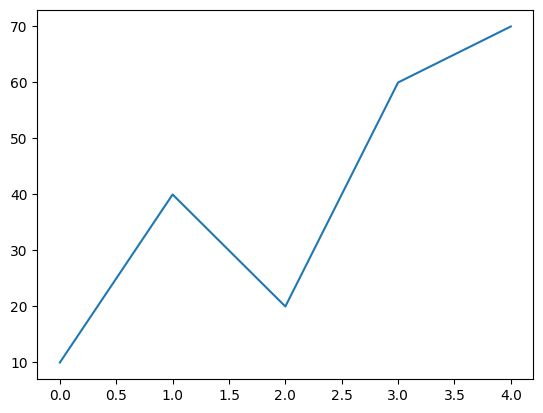

In [92]:
data = [10,40,20,60,70]

plt.plot(data)

- xlim, ylim
 - x축의 길이와,y축의 길이 조정

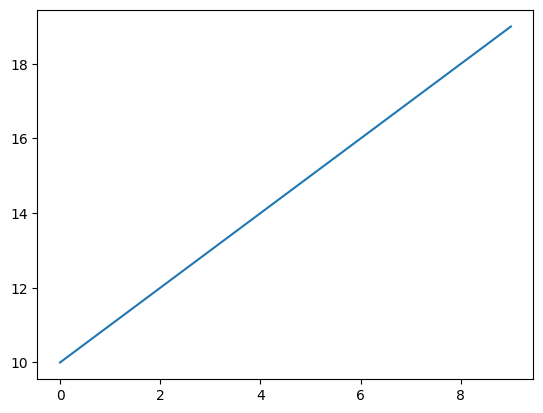

In [93]:
x = np.arange(10)
y = x+10

plt.plot(x,y)
plt.show()

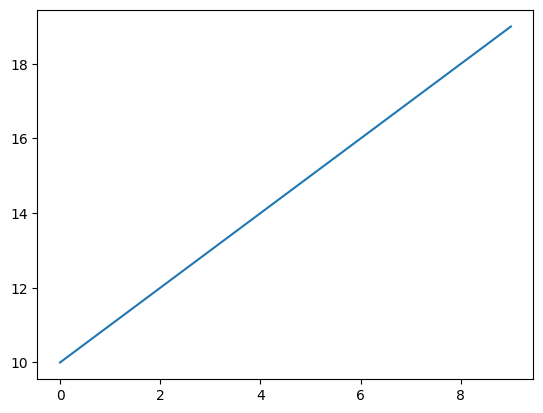

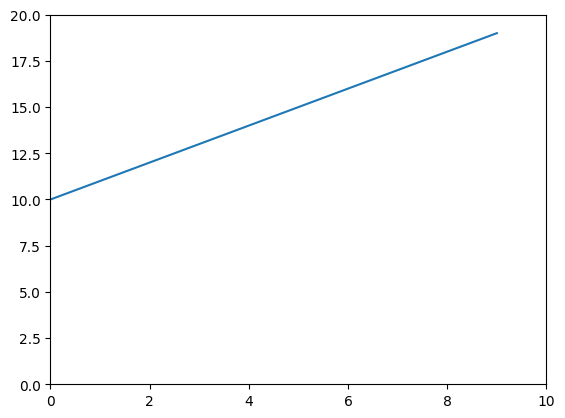

In [97]:
x = np.arange(10)
y = x+10

plt.plot(x,y)
plt.show()

plt.xlim([0,10])
plt.ylim([0,20])

plt.plot(x,y)

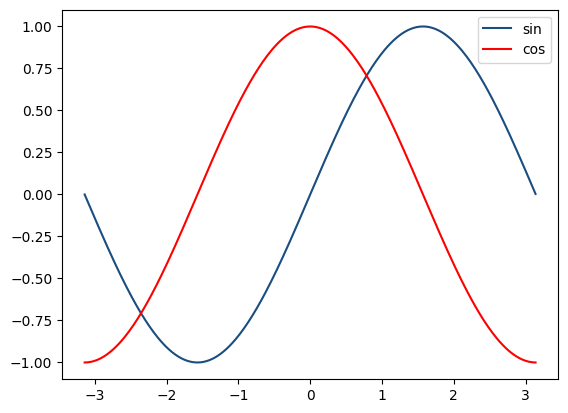

In [98]:
x = np.arange(-np.pi,np.pi,0.02) # pi : 파이(3.141592...)
y1 = np.sin(x)
y2 = np.cos(x)

plt.plot(x,y1,label='sin', color=(0.1,0.3,0.5))
plt.plot(x,y2,label='cos',color='r')
plt.legend()plt.show()

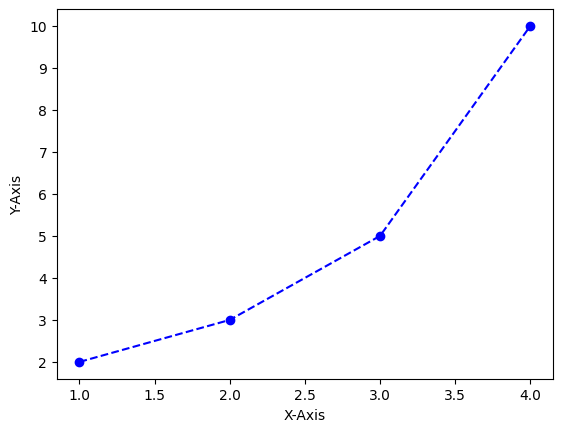

In [99]:
plt.plot([1,2,3,4],[2,3,5,10],'bo--') #b는 blue+ o은 plot위치에 찍히는 마크+ --는 점선으로 이어주세요.
plt.xlabel('X-Axis')  # 축이름
plt.ylabel('Y-Axis')  # 축이름
plt.show()

- Face color

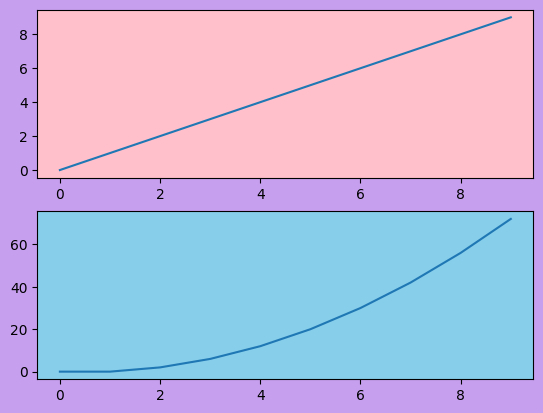

In [101]:
x = np.arange(10)
y1 = x
y2 = x**2 -x

fig,axs = plt.subplots(2,1) # 2행 1열로 그리겠습니다.
fig.set_facecolor('#c79fef') # 뒤의 배경

axs[0].plot(x,y1) # 첫번째 행
axs[1].plot(x,y2) # 두번째 행

axs[0].set_facecolor('pink') # 첫번째 행의 배경
axs[1].set_facecolor('skyblue') # 두번째 행의 배경

plt.show()

-Line plot

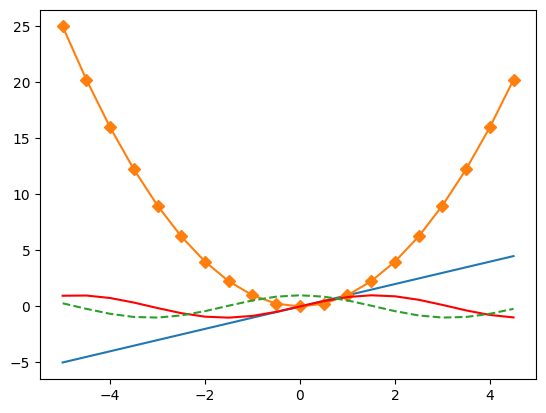

In [102]:
x = np.arange(-5,5,0.5)
y1 = x
y2 = x**2
y3 = np.sin(x)
y4 = np.cos(x)

plt.plot(x,y1)
plt.plot(x,y2, marker='D')
plt.plot(x,y3, color='r')
plt.plot(x,y4, linestyle = 'dashed')
plt.show()

- bar plot

<BarContainer object of 4 artists>

/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44284 (\N{HANGUL SYLLABLE GWA}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 48148 (\N{HANGUL SYLLABLE BA}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 45208 (\N{HANGUL SYLLABLE NA}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 48176 (\N{HANGUL SYLLABLE BAE}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 53412 (\N{HANGUL SYLLABLE KI}) missing from current font.
  func(*args, **kwar

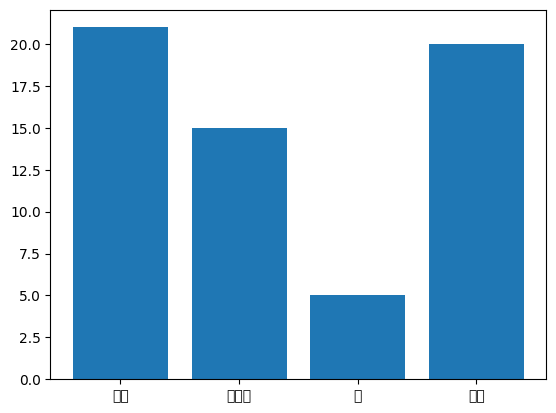

In [104]:
data = {'사과':21, '바나나':15, '배':5,'키위':20}
names = list(data.keys())
values = list(data.values())

fig,ax = plt.subplots()
ax.bar(names,values)

- hist

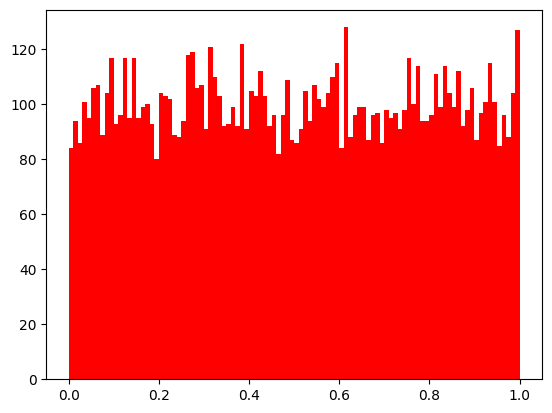

In [105]:
data = np.random.rand(10000)
fix,ax = plt.subplots()
ax.hist(data,bins=100,facecolor='r')
plt.show()

- 2D Scatter plot

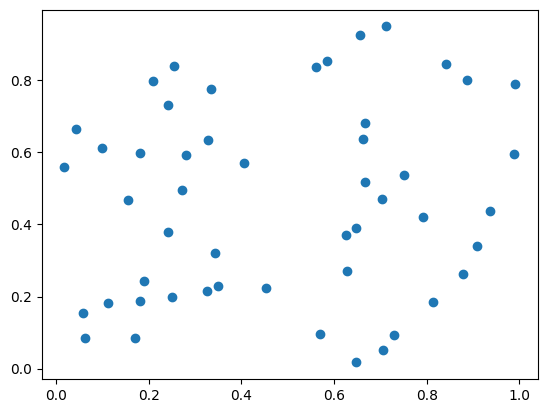

In [106]:
n=50

x = np.random.rand(n)
y = np.random.rand(n)

plt.scatter(x,y)
plt.show()